# Exploratory Data Analysis

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly
plt.rcParams['figure.figsize'] = (15, 9)
train = pd.read_csv("train.csv")
train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


The three columns in our dataset are 

1. id which is a unique identifier of each text line.
2. text line from the book.
3. author of the book.

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19579 entries, 0 to 19578
Data columns (total 3 columns):
id        19579 non-null object
text      19579 non-null object
author    19579 non-null object
dtypes: object(3)
memory usage: 459.0+ KB


Checking for NULL values

In [34]:
train.apply(lambda x: sum(x.isnull()),axis=0)

id        0
text      0
author    0
dtype: int64

In [35]:
train.shape

(19579, 3)

In [36]:
train['author']

0        EAP
1        HPL
2        EAP
3        MWS
4        HPL
5        MWS
6        EAP
7        EAP
8        EAP
9        MWS
10       MWS
11       EAP
12       HPL
13       HPL
14       EAP
15       MWS
16       EAP
17       MWS
18       EAP
19       HPL
20       EAP
21       HPL
22       EAP
23       EAP
24       EAP
25       EAP
26       EAP
27       EAP
28       HPL
29       HPL
        ... 
19549    MWS
19550    EAP
19551    EAP
19552    EAP
19553    EAP
19554    HPL
19555    EAP
19556    EAP
19557    EAP
19558    EAP
19559    HPL
19560    EAP
19561    HPL
19562    EAP
19563    MWS
19564    EAP
19565    EAP
19566    MWS
19567    EAP
19568    EAP
19569    MWS
19570    MWS
19571    HPL
19572    EAP
19573    MWS
19574    EAP
19575    EAP
19576    EAP
19577    EAP
19578    HPL
Name: author, Length: 19579, dtype: object

In [37]:
train['author'].value_counts()

EAP    7900
MWS    6044
HPL    5635
Name: author, dtype: int64

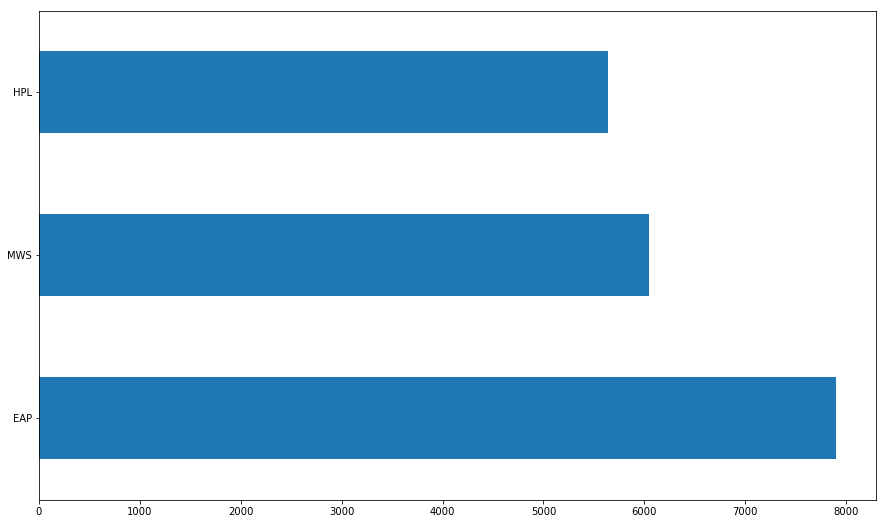

In [38]:
train['author'].value_counts().plot(kind='barh')
plt.show()

This shows the count of texts for each author.

1. EAP (Edgar Allen Poe) : 7900
2. HPL (HP Lovecraft)    : 5635
3. MWS (Mary Shelly)     : 6044

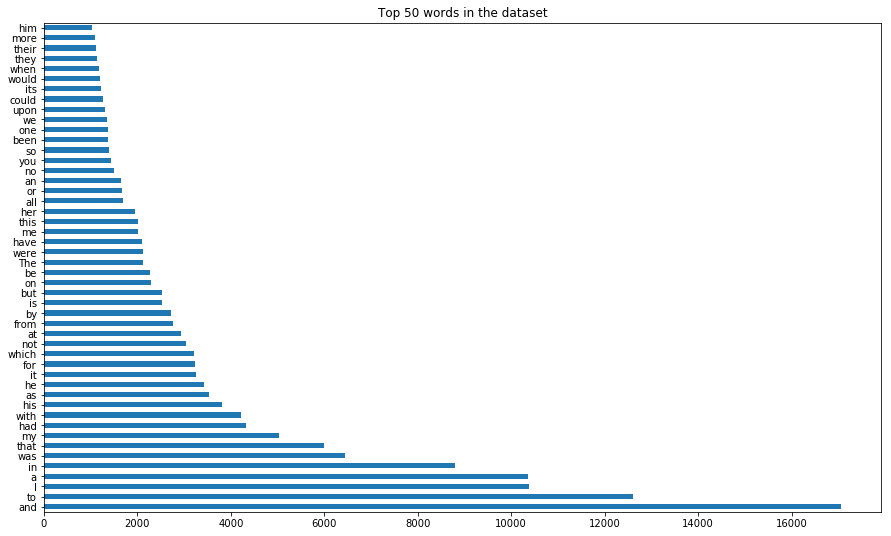

In [39]:
all_words = train['text'].str.split(expand=True).unstack().value_counts()[2:50].plot(kind='barh')
plt.title('Top 50 words in the dataset')
plt.show()

These words are not only the common words that occur in the spooky author books but in almost all the books. So we could elminate these words and all common words so that our machine doesn't spend time learning them.

### Removing Stop Words

Inserting the texts into a list

In [40]:
from nltk.corpus import stopwords
# removing stop words
all_words_x = []
all_words_x = train['text']
print(all_words_x)
#filtered_words = [word for word in all_words if word not in stopwords.words('english')]

0        This process, however, afforded me no means of...
1        It never once occurred to me that the fumbling...
2        In his left hand was a gold snuff box, from wh...
3        How lovely is spring As we looked from Windsor...
4        Finding nothing else, not even gold, the Super...
5        A youth passed in solitude, my best years spen...
6        The astronomer, perhaps, at this point, took r...
7              The surcingle hung in ribands from my body.
8        I knew that you could not say to yourself 'ste...
9        I confess that neither the structure of langua...
10       He shall find that I can feel my injuries; he ...
11       Here we barricaded ourselves, and, for the pre...
12       Herbert West needed fresh bodies because his l...
13       The farm like grounds extended back very deepl...
14        But a glance will show the fallacy of this idea.
15       He had escaped me, and I must commence a destr...
16       To these speeches they gave, of course, their .

Plotting to see the most used words with a word cloud

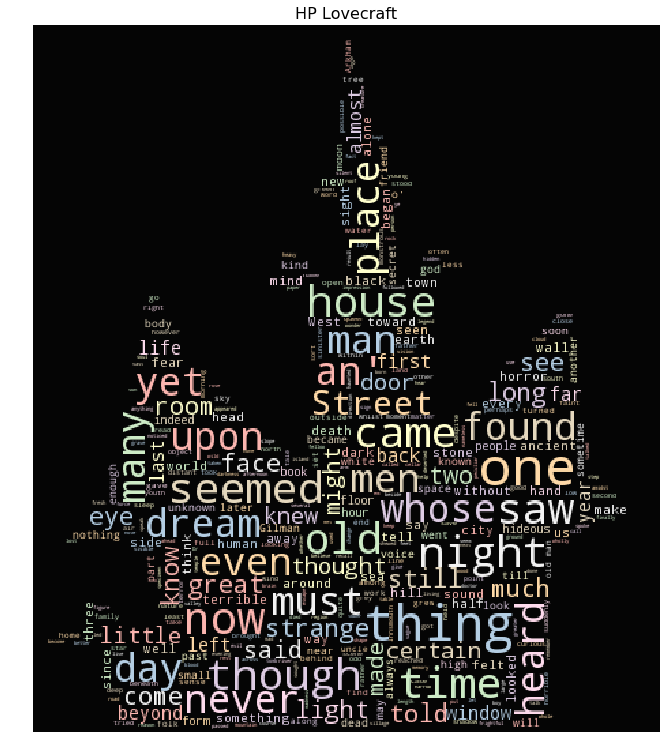

In [41]:
eap = train[train.author=="EAP"]["text"].values
hpl = train[train.author=="HPL"]["text"].values
mws = train[train.author=="MWS"]["text"].values
hpl_64 = b'iVBORw0KGgoAAAANSUhEUgAAAcwAAAIHCAIAAACdfvs7AAAABGdBTUEAALGPC/xhBQAAAAFzUkdCAK7OHOkAAAAgY0hSTQAAeiYAAICEAAD6AAAAgOgAAHUwAADqYAAAOpgAABdwnLpRPAAAAAlwSFlzAAAN1gAADdYBkG95nAAAAAl2cEFnAAABzAAAAgcAmUoq2wAAUbpJREFUeNrt3XlgDVf7B/DnZk9EYokgVHlL0VJrlFKNNWhF+FmqRdGqtbb2rf1FW0q1Ra2liy2lKFISJLVVbLWlRARJkFX27Wa7Se79/RFNI+u9c2fOc2bm+fzVxr0zz1zxzckzZ87RGAwGIEQ+9Hp9QEDAgAEDsAshxCgW2AUQYpqoqKjVq1djV0GIsShkiczcvXv37NmzN2/exC6EEKNQyBKZCQsLA4ANGzZgF0KIUShkiczcu3cPAPbt25ecnIxdCyHVo5AlMnP37l0AyM3N3bp1K3YthFRPQ7MLiLw0aNAgISEBABo2bPjo0SMbGxvsigipCo1kiZykp6cXJywAxMfHHzlyBLsiQqpBIUvkJCIiovT/btu2DbsiQqpBIUvkJCoqqvT/njlzpsxXCOENhSyRkzKRqtfrd+/ejV0UIVWhkCVyUn7cunPnTrp5S3hGIUvkpHzIPnjw4NKlS9h1EVIpClkiJxV2YHfs2IFdFyGVonmyRE5KJsmW5uzsHB8fb29vj10dIRWgkSyRjfz8/PIJCwAZGRk0YZZwi0KWyEZcXFxlf7R//37s6gipGIUskY2kpKTK/ujEiRNZWVnYBRJSAQpZIhtPnjyp7I/y8vL8/PywCySkAhSyRDYSExOr+NODBw9iF0hIBShkiWzEx8dX8afHjx/Pzs7GrpGQsihkiWxU0ZMFgJycHH9/f+waCSmLQpbIRtUjWQA4cOAAdo2ElEUhS2Sj6pEsAPj7++fm5mKXScgzKGSJbFQbstnZ2adPn8Yuk5BnUMgS2UhNTa32NfToF+ENrV1AZMPW1lan01X9Gjc3t5iYGI1Gg10sIU/RSJbIg1arrTZhASAuLu7GjRvYxRLyLwpZIg/VNmRL+Pr6YhdLyL8oZIk8GNOQLUbP1xKuUMgSeTA+ZG/evBkTE4NdLyFPUcgSeTA+ZA0Gw9GjR7HrJeQpClkiD8aHLACcOHECu15CnqKQJfJgUsiePn06Pz8fu2RCAChkiVykpaUZ/2KtVnvhwgXskgkBoJAlcmFSyALA8ePHsUsmBIBClshFenq6Sa8/efIkdsmEAFDIErkwdSR7+/bt6Oho7KoJoZAlMmFqyAINZgkfKGSJPJg0u6AYtWUJD2gVLiIPNWvW1Gq1Jr3F2dk5KSnJ2toau3aiajSSJTJQUFBgasICQEZGxuXLl7FrJ2pHIUtkQEBDthhtrUjQUcgSGRAcsnTvi6CjkCUyYOok2RLBwcFxcXHY5RNVo5AlMiB4JGswGAIDA7HLJ6pGIUtkQMD8rRI0kYvgopAlMpCSkiL4vYGBgUVFRdhXQNSLQpbIgDkhm5qaeunSJewrIOpFIUtkIDk52Zy3065fBBGFLJGBxMREc95OIUsQUcgSGTCnXQAAt2/fjoqKwr4IolIUskQGzBzJAg1mCR4KWSIDSUlJZh6Bnq8lWGgVLiID1tbWhYWF5hzB0dExOTnZ1tYW+1KI6tBIlvAuOTnZzIQFAK1We+7cOexLIWpEIUt4Fx8fL8pxDh06hH0pRI0oZAnvxArZ33//Xa/XY18NUR0KWcK72NhYUY4THx9Pa3gT9ihkCe/EClkAOHz4MPbVENWhkCW8E6tdABSyBAOFLOGdiKtuR0RE/P3339gXRNSFQpbwTsR2AQAcOXIE+4KIulDIEt6JG7I0kYswRk98Ea7l5OTUqFFD3GPeuXPnpZdewr4yohY0kiVci4iIEP2Yv/zyC/ZlERWhkCVci4yMFP2Ye/fupV/gCDMUsoRr4eHhoh8zMjKSNqQhzFDIEq5J0S4AgD179mBfGVELClnCNSnaBQBw4MCBgoIC7IsjqkAhS7gmRbsAAJKTkwMCArAvjqgChSzhV35+/uPHjyU6uI+PD/b1EVWgkCX8unv3rvnLdVfm0KFDZu40TogxKGQJv4KDg6U7eH5+/s8//4x9iUT5KGQJv27fvi3p8bdt20bLeBOpUcgSfkkdsuHh4X/88Qf2VRKFo5Al/JI6ZAFg69at2FdJFI4WiCGcevLkScOGDaU+i5WV1aNHjxo1aoR9uUSxaCRLOMVgGAsAhYWFP/zwA/a1EiWjkCWcunbtGpsTbdu2TafTYV8uUSwKWcKpCxcusDlRXFzc7t27sS+XKBb1ZAmP9Hq9i4tLWloam9O1aNEiLCzMwoLGHER89F1FeBQaGsosYQHgwYMH+/fvx75ookwUsoRHQUFBjM+4atUq+q2OSIFClvCIWUO2xN9//+3n54d93USBKGQJj9iPZAHgyy+/xL5uokAUsoQ7MTExjx49Yn/eixcvnjlzBvvqidJQyBLuIK4nsHz5cuyrJ0pDIUu44+vri3Xqc+fOUWeWiIvmyRK+5Ofnu7i4aLVarALatm0bHBxMc2aJWOg7ifDl3LlziAkLALdv36YHwIiIKGQJX3j4bX3RokW4QU+UhEKW8IWHkI2NjV2xYgV2FUQhqCdLOBIWFta6dWuT3tL/NejQyuQT+fhBTEJVL7C1tb19+3aLFi2wPxIie1bYBRDyr2PHjpn6lolDYdQAk0+UXwDrquy75ufnz5kzR0A9hJRB7QLCkX379pn6FpfaQk7k+Vr1r/Hz8ztw4AD2R0Jkj9oFhBf37t1r1crk3/xvHYK2pv9On5sPdbtDbn41L2vYsOGdO3dq1xYU5IQAAI1kCT9++eUXAe+qJygA7W3h9U7Vvyw+Pv7TTz9F/lyIzFHIEi4YDAYfHx8BbxTWLgCA/kZ0DADgxx9/PHXqFNrnQuSPQpZw4ezZsxEREaa+y6U2WFkKPKNnd6NeZjAYJkyYwHIFcaIwFLKEC8K2jK3rLPyMbZpD4/pGvTI6Onr69Ok4nwuRPwpZgi81NfXQoUMC3li/rlnnNXIwCwB79+4VMPOBEKCQJTzYvXt3Xl6egDcKbsgWM7ItW2zKlCmRkZFMPxeiCBSyBJler9+4caOw9wqbWlCib1ewNPpfQEZGxvDhw4X9MCBqRiFLkB09ejQ8PFzYe81sF9RxBvc2Jrz+5s2bs2bNYvfREEWgkCXI1q1bJ/i9dWuZe3bj27LFtm3btnPnTok/EqIoFLIE0/Xr18+ePSv47WaOZMH0kAWAqVOnXrlyRdKPhSgJhSzBtHLlSnPebuaNLwDo0hZqO5n2ltzcXG9v75iYGGk/GqIUFLIEzd27d48cOWLOEVzrmFuDpQX07Wryu548eeLl5ZWTkyPdh0MUg0KWoFm5cqVerzfnCOaHLJg4kavEzZs3R48eXVRUJMlHQxSEVuEiOMLCwtq2bVtYWGjOQQqChT9WWyL6CTTpJ/C9kyZN+v777zUajSSfEVEEGskSHEuWLDEzYc1ZuKC05xrAy80Fvnf79u0LFy4U/9MhCkIhSxBcu3btt99+M/Mg5ixcUIawjkGxVatWbdiwQbRSiOJQyBIE8+bNM79PZf78rRLGbJRQhVmzZm3ZskW0aoiyUMgS1vz8/E6fPm3+ccyfv1WiZ2ewtxX+doPBMH369O+//160goiCUMgSpoo3KBTlUGYuXFCavS307GzWEQwGw9SpU7dv3y5aTUQpKGQJU+vWrXvw4IEohxKxXQDmtWWLGQyGyZMnU3+WlEEhS9iJj4838xGv0sxfuKA0M9uyxQwGw8yZM5ctWyZmZUTmKGQJO7NmzcrMzBTraOKOZF9uDs81EOdQy5cvnzFjhpnPWRDFoJAljPj6+h44cEDEA4p446uYgMViKrNp06Z3332XFp8lQCFL2MjMzJwxY4a4xxTlmdrSzG/LlrZv377evXsnJiaKXCWRGwpZwsK8efNEX7ZK9JDt86oJGyUY49KlS127dr1z547IhRJZoZAlkjt58qQUc0jFvfEFAHWcoUtbkY/58OHDnj17Us6qGYUskVZqaurEiRNFX4dIrIULyhCxLevo6Dhs2LCff/45LCzs5ZdfFr9WIhNW2AUQhZsyZUpcXJzohxVx4YLSPLvDss1mHaFRo0ZvvfXWkCFDevXqZWdnJ0mVRFYoZImEkpKSHj16JMWRxZ2/VcK9DdRxhtQMk9/YoUOHwYMHe3l5dezYkVY+JKVRyBIJ1atX76+//vLz81u+fPnVq1dFPLLo87eKWVpAn1fhQIBRL7axsfHw8BgyZMhbb73VpEkTSQoi8keLdhNG/P39ly1bJlbUOjqIP7ugWFompBnxwMS6desmTpxYs2ZNSYogCkIhS5gSN2qxdO7cWe6XQJih2QWEqUGDBhU3ELp06YJdi3BLlizBLoHIBo1kCRp/f//ly5f/9ddf2IWYpl27djdv3qS7W8RINJIlaAYNGnTlyhXZjWrnz59PCUuMRyNZwgV/f//PPvvsypUr2IVUw8XFJTY21sbGBrsQIhs0kiVcGDRo0OXLl/38/F599VXsWqoyduxYSlhiEhrJEr7odLq6detqtVrsQioWEhJCz8gSk9BIlvDFxsamV69e2FVUzN3dnRKWmIpClnDH09MTu4SKDR48GLsEIj8UsoQ7FLJESagnS3jUvHnziIgI7Cqe0aRJk8ePH2NXQeSHRrKER/3798cuoSxux9eEcxSyhEcDBgzALqEszueWEW5Ru4DwSKvVuri45OfnYxfyL5q8RYShkSzhkaOjY79+/bCr+Jezs3Pr1q2xqyCyRCFLOOXt7Y1dwr9eeeUVCwv6x0KEoO8bwqnBgwdbWkqwV6IgL774InYJRK4oZAmnXF1du3cXb/NY87Ro0QK7BCJXFLKEX/x0DMQdyWZkmL5TI5EtClnCr6FDh2KX8FTjxo1FPNqvv/6amJiIfU2EEQpZwq+mTZt26NABuwoAgLp1xdyC/Pz583/88Qf2NRFGKGQJ1zjpGNSvX1/Eo12+fPnEiRPY10QYoYcRCNdCQkLatm2LW4OdnV1ubq5YR0tKSnJ1dXVyckpISLCzs8O9NMIAjWQJ19q0adO8eXPcGmxtbUU8WlBQEABkZmYeO3YM97oIGxSyhHfot79q1qwp4tEuXrxY/B+7du3CvS7CBoUs4R16yIr7rFfJANbPz+/hw4e4l0YYoJAlvHv11Vfd3NwQCxAxZCMiIsLCwor/W6/Xb968GfG6CBsUssQoW7duLSoqQjm1hYXFoEGDEK9dr9eLdSg/P7/S/7t9+/bU1FTESyMMUMgSo2zevHncuHFYOauYBbPLhGxGRsbq1auxiyLSoilcxCivvPLK7du3hw8f7uPjY2Njw/js6enpLi4uWBHv6uqakJBg/nEqXCTXwcEhPDy8YcOGKJdGGKCRLDFK8eP2Bw8eHDVqlE6nY3z2WrVqde3aFeva8/LyRDnOsWPHyi9DnpOT89///hfr0ggDFLLENEeOHBk6dCj7PQsQd/3KzMwUpS37448/Vvh1Hx+fU6dOYV0dkRqFLDFKdnZ2yX/7+/sPHTqU8XgWty2blpZm5hEePnx4+vTpyv50ypQpWVlZiBdIpEMhS4xSWFhY+n+PHz/u7e3NMmc7d+5cu3ZtrMs3P2R/+umnKobD4eHhM2bMwLo6IikKWSLQ8ePHWY5nLS0tEduy6enp5ry9qKhox44dVb9m165d9AyYIlHIEqNUePPH399/2LBhzHIWMWTNHMmeOHEiJiam2pdNnTr1ypUrWNdIJEIhS4xS2Z0uPz8/ZvfBunXrhnX5Zo5kv/76a2NelpOTM2TIEGPimMgIhSypXkFBQRV/6u/vP2TIkJycHKnLQFzA25yR7Llz586ePWvkixMSEvr06fPkyROsKyWio5Al1av20c+TJ096eXlJnbMuLi4NGjRA+QTMeRhh2bJlJr3+/v37/fr1S0pKQrlSIjoKWVK9lJSUal9z6tSpQYMGabVaSSt56aWXUD4BwVtymTSMLRESEuLh4REVFYVysURcFLKkekb+az937tzAgQPNn+1UBXF3jTVefHy8sDeaOowtERoa+tprr4WEhKBcLxERhSypXmRkpJGvDAoK6tmzZ2xsrESVYK15KKxdEBAQIGAYWyI2NrZ79+6HDh1CuWQiFgpZUr27d+8a/+KQkJDu3buXrJoqrkaNGqF8AgJCNj8/f9asWWaeNzMzc/jw4fPnzy/zMAiREQpZUr1Lly6Z9PrHjx/36NHj8uXLolfi6uqK8gkIuN2/du1aUX7SGAyG1atX9+jRQ6KfW0RqFLKkGllZWcHBwaa+KyUlpU+fPkePHhW3GHt7e6wPwaQNa+/du/fZZ5+JWMCVK1c6duy4fv16GtLKDoUsqcbRo0eFLeSak5MzdOjQlStXirhmsbgbx5rE+MFsUVHR+PHjRdxFvFhubu7s2bPd3d1LtmIkskAhS6rxyy+/CH5vUVHRokWLhg0blpmZKUox4u5paBLj94lZtWqVFK2SYsHBwT169Hj33XcjIiKwPgpiEgpZUpUHDx6cPHnSzIMcOXKkS5cuJt09qwyD58oqY2TInjt3bunSpZJWYjAYfvnll9atW0+dOjU6OhrrAyFGopAlVVm2bJkoTcB79+516dLlt99+M/M4Yo2IBTAmZBMSEkaPHs1mm5yCgoKtW7e+8MIL48ePv3PnDtbHQqpFIUsqdfXq1X379ol1NK1WO3z48EmTJpmzOrWZC7WYo9rnXPPz84cMGSL4sQVhCgoKdu7c2bZt2/79+//2229VrzJBUFDIkopptdoxY8aIuBt2sR9++KFDhw7nz58X9vb79+9jfSBVj2QNBsP777+PtVChwWAIDAwcPnz4888/P2/evL///hvnMyIVoZAlFTAYDDNmzJAo0SIiIjw8PKZMmSJgWHrv3j2sz6TqkF24cKGPjw9WbSXi4+O/+uqr9u3be3p6Cl5vgYjMQEg5c+bMYfC916BBAx8fH71eb3xhLVu2xPqXMnbs2MqqWrFiBVZVZTRt2nTKlCn+/v6FhYXY30TkKQpZ8gy9Xv/pp5+yzIWuXbueOXPGmNri4+M1Gg1Wfo0YMaLCqtauXYtVkoODQ/v27ceOHbtmzZqAgID4+Hjsbx9SASus7w/CoczMzHHjxvn6+rI86eXLl3v16jVkyJClS5dWvSz3qVOnDOI912CqCmePrVixYvHixWwKaNiwYceOHV955ZUWLVq88MILL7zwAtZKDsQ02ClPeHH9+nWshQSLaTSaN99889KlS5VV+N577yGW169fv9LF6PX6Tz75ROoPpFOnTkuXLj127FhcXBz2NwgRiEKWGFJSUqZNm2ZpaYkYYaV169bNx8cnLy+vdJHZ2dlOTk6IVfXo0aOkmJycnFGjRkl3rrp16y5YsODx48fY3xpEBBSyqqbVatetW+fi4oIYXpWpX7/+/PnzQ0JCikvduXMnbj0lIRsbG9ulSxeJzmJlZTV37tysrCzsbw0iGgpZQ2Fh4e+//45dBWsJCQlLliypU6cObnIZo3379l9//TXifuDFPDw8DAbD6dOnGzZsKNEp6tSpc+HCBexvDSIyjQHvTgIngoKC3nvvvbCwMGtra+xaJKfT6U6ePLl3797Dhw/n5eVhlyMnAwcO7Nat2/LlyyV6arZevXqnTp1q27Yt9oUSsWGnPL7iu8ObN2/GLkRCubm5gYGBH3zwgSyGrnySdAEwjUZz9OhR7G8TIgkayUKnTp1u3LjRsGHD8PBwBwcH7HJEo9frg4OD//jjjz/++CMoKEj05U2JiCZOnPjjjz9iV0EkofbHahMTE4uX/Y+Pj9+4cSN2OWLKysqKi4vTarUWFhaIa12Tamk0mgULFmBXQaSi9pHsrl27SmZf1qlTJzIy0tnZGbso8RkMhvv371+5cuXPP/88d+5ceHg4dkXkX56enidOnMCugkhF7SPZ0itSp6amrlmzBrsiSWg0mpYtW44bN+6HH3548OBBTEzMnj17Pvzww+bNm2OXRmDw4MHYJRAJqXokazAYGjZsWHq3Z0dHx4iICKwtUVHcv3/fz8/v2LFjQUFBOp0Ouxw1unbtWqdOnbCrIFJRdciGhISUnzEza9asdevWYZeGICMjIzAwcP/+/ceOHaO7ZMzY2NhkZWXZ2NhgF0Kkoup2wenTp8t/cevWrY8fP8YuDYGzs/Pw4cP3798fHx+/ffv2nj17Ii55pR516tShhFU2VYfsqVOnyn8xPz9/yZIl2KVhcnZ2/uCDD86dO/fw4cNFixbR1FpJ4S7IQBhQb7ugqKjIxcWlwsX5LSwsrl692rFjR+wauZCdnb19+/Z169apc4AvtU6dOl27dg27CiIh9Y5kr1+/Xtn2JwxWsZORGjVqzJ49+8GDB7t370bcmECp6BcFxVNvyJ49e7aKPz1z5szRo0exa+SItbX1mDFjQkJCNm3axOeqXTJFC28rnnpD9sKFC1W/YN68eYWFhdhl8sXKymratGmhoaHvvPMOdi0K4ebmhl0CkZZKQ9ZgMFy8eLHq19y9e3fbtm3YlfKoXr16Pj4+vr6+devWxa5F9ho0aIBdApGWSkP2/v37ycnJ1b5s+fLlmZmZ2MVyysvL68aNG6+99hp2IfJGI9nKFBQUJCUlYVchApWGbFBQkDEvS0xMXLVqFXax/GrSpMmpU6dGjhyJXYiMSbcEuKzpdLq3334bcSdgEak0ZKvtFZRYt25dVFQUdr38srOz27dv34wZM7ALkStqF5Sn0+mGDx9+6NCh3bt36/V67HLMpdKQrfauV4nc3Fxmez7LlEaj+e677z788EPsQmSJ2gVl5OXlDRkypHhuT0xMTIVPDMmLGkM2KSnp/v37xr9+z549ly9fxq6aaxqNZuvWrV5eXtiFyEzdunXt7Oywq+BITk6Ol5dX6YUf0TfQNJ8aQ/bSpUsmPedmMBg++ugjBfzaIimNRrNr166XXnoJuxA5oV5BadnZ2W+99VZgYGDpLx4+fFjuN5/VGLLG9wpKXLt27aeffsIunHfOzs5z587FrkJO6K5XiaysrIEDB545c6bM13Nyckov+ixHagxZI6cWlLFw4cLKHsMlJQYPHizphoM8eOE5GPOWOIeihmyxjIwMT0/P8+fPV/inR44cwS7QLAr/91BeXl7ejRs3BLwxKSlp6dKl2OXzztXVtWvXrthVSKVWTfj6Ewj1hbcHinNAahcAQFpaWr9+/S5dulTZC/z9/QsKCrDLFE51IXvjxo28vDxh7928eXNISAj2FfBOkZup2FjD3HHwwA8+fg9srMFepH0pqV2QkpLSt2/fq1evVvGa9PT0c+fOYVcqnOpCVkBDtkRhYeHMmTOxr4B33t7e2CWIbGgfuHMEvvkvuNR++hV7kWYEqHx1mKSkpD59+hjzm+Xvv/+OXaxwVtgFsGbm2p1nzpw5cODAiBEjsK+DX61atWrRosWDBw9EPKb2L6hhb8LrI6Kh+SARztv1FVg7D7q+Uvbrjg7iXJeaR7IJCQm9e/cODQ015sXHjx/Hrlc41Y1kr1+/buYRPvnkk5ycHOzr4Jq4E2btbU1LWABIzTD3pM2bwC+r4eKeChIWxAtZ1fZk4+LiPDw8jExYAAgPD4+JicGuWiB1hWxqampERISZB4mKivr888+xL4Vrnp6eIh6tnumrWqeZMbGy+O7WnSMwehBUtsmZnUibcqmzXRAdHd2rV6+wsDCT3lV+dpdcqCtkhc0rKO+bb76hO2BV6N69u7W1tVhHc2UVsjbW8PF7/97dqoKDiSPrCjk7O9vbi3EgWXn8+LGHh4dJj1wWq3DbU1lQV8iKtZlSQUHBlClTVLs9WrUcHBzc3d3FOlrJ7SbjpaSb9nqN5undra8/Mep0TjVEuC4V9goePnz4xhtvREZGCngvjWTlQcQd6y5cuLB9+3bsC+LXG2+8Idah6pu+MrhJPVmX2nBxDxxaB82bGPsWjQZsze4YNG7cWJwPSCYePHjwxhtvCN6O8/Hjx48ePcK+CCHUFbJitQuKzZ8/PzExEfuaOCViyLrUMvktJrULatWs+O5W1cyfKquqqQVhYWEeHh7R0dHmHOSvv/7Cvg4hVBSyycnJDx8+FPGAaWlpc+bMwb4sTvXo0UOstqyAnqxJI1mdoIeJnBzNvS71tAtCQ0M9PDzi4uLMPM6VK1ewL0UIFYWs+ZO3yvvll1/KLBpEitWoUaNTp06iHIrx7AIjmT+SVcnCBX///beHh0dCQoL5hxKx3ceSikJWor+hadOmCX5OV9nE2v6rnuk3vsyfJ1st8x/6UkO74MaNG3369BFrq65r164VFRVhX5PJVBSyUoxkASA8PPyLL77AvjgedejQQZTjCGgXpJgSslpBT5aY/zyC4tsFV69e7du3b0pKilgHzMnJkePUSQpZEaxZs+bOnTvY18cdsUK2bi2T32JSu0DY2MjUh9DKU/ZI9tKlS/369UtLSxP3sLdu3cK+MpOpJWQTExOl2w9Rp9NNnDhRjr/ISKpVq1YODiI8f9rAxeS3yKInW69ePcmrRBIUFOTp6ZmRIX7X5vbt29gXZzK1hOzNmzclPf5ff/31zTffYF8lXywtLdu2bWvmQQQsXJCTB3n5Jrxe2CMlDub1ZG1sbOrUMb0PIgdnz54dMGBAVlaWFAendgG/GPyWsXTpUlMfx1Y88zsGrqY/iWDqMDZTK6SwmuY99OXiYvr4XA4CAwPffPPN7OxsiY4vx76cWkI2ODhY6lPk5eVR06CMjh07mnkEAVMLTH2mVhgzZxco8q7XiRMnhgwZIukadVFRUVJ0ISSllpD9+++/GZzl0qVL69evx75WjrRp08bMIwhYuIDB/C0weyEu5Y1kjx07NmTIkNzcXKlPJLuOgSpCNj8//969e2zOtXjxYnHXq5a1Fi1amHkEAQsXCLjrVWj6rx/ONc26LoVNLTh8+PD//d//6XQ6BucStr4MIlWEbEhISGFhIZtz5ebmTpw4Ua/XY180F1xcXGrVqmXWEUx/t4CRbLbpwy8zZxcoaSS7f//+UaNGsUlYAGA2YBKLKkKW8dy6oKCgDRs2YF80L5o3b27O25ktJmsqO/NCVjEj2V9++eWdd95huZus+evuM6aKkGXTkC1t0aJF4eHh2NfNBTM7BnwuXAA0uwAAAHbu3Dlu3DjGN3tl146jkJVEdnb2mDFjmPUoePbCCy+Y83YBswuSTX/IyKR5tcXMfOJLASPZH374AWU6jeyGL6oIWZRH8a5cubJy5UrsS8f34osvmvN2Nu2CfNPbiSrvyW7ZsuXDDz9EufeQkZGRmpqK/QGYQPkhGxUVhfVX8vnnn8t0BUwRPf/88+a8XeqFCwQz84mv+vXrs6hSGhs2bJg+fTri9kvy2rlW+SGLuKJEYWHhmDFjtFpBTxQphZm/FwtYuIDNPFkze7LOzs4sqpTAN998M3PmTNwN7ihk+cK+IVtaeHj47NmzsT8DTOY82iRg4QIQNJIVMoXLjJGspaWlo6PZOytgWLVq1SeffIJdBZi/yQJLFLKS+/HHH48cOYL9MaCpWbOm4LW4BCxcACYuJltMwMMI5jzxJdNh7Oeff75gwQLsKgBoJMsbHhag/PDDD588eYJdBRrB+6wImFpQWCRwwRdTmfPEl5kPaKBYvHjx//73P+wqnjJzQ0bGFB6yubm5PEz4SEpKmjhxIm4bC5HgmzwCFi5gc9cLzJtdILuR7Pz581esWIFdxb9oJMuR27dvc7Is1vHjxzdu3IhdBQ7BbVk2CxcAQIbpa5/aWIOF0H89MgpZg8Hw8ccfr169GruQZ1BPliNcraP+ySef3LhxA7sKBIK3AGCzcIFgNYVu+yCXkDUYDB999NG3336LXUhZNJLlCFchq9PpRo4cKbvVMM3n5OQk7I3cLlxQrIbQkJVFT9ZgMEydOnXTpk3YhVQgPT1dRjMjFR6yDNbqNklERMSkSZOwq2CtZk2BN4kELFwg4JlaACgS9OCS4AkG/I9ki4qKPvjgg++//x67kErJaDCr8JDlaiRb7MCBA5s3b8auginBI1kBswuEjWSF7QouePkCzkO2qKhowoQJP/30E3YhVYmNjcUuwVhKDtnY2Fg+n3GeO3euqpqzgkeynLcLBD/0xXPIFhUVjRkzZvfu3diFVCMhIQG7BGMpOWR56xWUyM/PHzVqVGYmwzxAJThkeZ7CBWYsKcttyOp0urfffnvfvn3YhVQvKSkJuwRjKTlkOewVlAgPD1dPc1Zwu0DAFC5hswsErMIFZkyVFfwInKR0Ot2oUaMOHjyIXYhRUlJSsEswlpJDlodnvaqwf//+LVu2YFfBgrBMEbZwgbCQzRMUss5Clx/gcOGC/Pz8YcOGyej578TEROwSjKXkkEVftaBac+fOvXr1KnYVnBK4cEE6uwoFtwssLS3ZVWmE3NzcIUOG+Pn5YRdiguTkZOwSjKXYkM3Pz79//z52FdXIy8sbNmyYjLpLwlhbWwt4l4CpBcC2Jyt4IS7BTWop5OTkDB48+OTJk9iFmIbaBfhCQ0NlsftLTEzM8OHDWe5Dx56wdoGAu14gNGRzTF/qEMx44stC8AO5YtNqtYMGDTp16hR2ISaj2QX4+O8VlPjzzz95WKOTNwLueoHQnmyBoB/HDkLnyQq+EyiuzMzMgQMHnjt3DrsQIWgki4/nqQXlfffddzt37sSugi8CFi7IyhayMqxggmcXaDQadlVWIiMjo3///kFBQdiFCJSSkiKXZe0oZHkxderU69evY1chCWG/HQsYyQpYrtscZm5Yiyg1NbVPnz6y3oCuqKhILve+FBuy3D6JUJnc3NyhQ4cq8iaYsIGbgJ6s4CW4MrOFvMvMbb6wJCcn9+3bVwE/0eXSMVBmyD558kSOaRUdHT1ixAhZ3K8zibAlfZktXAAAwn7vNGcHGiyJiYm9e/e+efMmdiEikMu/cWWGrOx6BSXOnTtHN8GKCVm4gG27wJy9FFE8efLEw8NDvv86yqCRLCbZ9QpKW79+vcKeBMvLyxPwLiHtAqEjWWG7Zwh+4gtFbGysh4fH3bt3sQsRDYUsJrn/rP7oo4/++OMP7CpEk5+fL+BdzBYuAKFLHQp+4ou9qKgoDw+Pe/fuYRciJj7X2CuPQpZHRUVFw4cPl/tVmEPYwgUsn6kF8/ZSZOnRo0ceHh487CgqLurJoikoKLhz5w52FebKyMgYPHiwXL6NqibgeTZhCxewfKYWzJhdwHLrlMjIyDfeeOPhw4fMzsgMjWTRhIWFKeMp1cePHw8ePDgnR9CvsjwRcAmMFy7QCfp+cRB644vZDsr379/v2bNnVFQUm9MxRiGLhvMVDk1y5cqViRMnyuXJlsoIWJ6c5cIFAJArpGksfHYBmx+cd+/e9fDwkNE2LaaihxHQyHpqQXm//vrrwoULsaswi4DfjlkuXCCY4Ce+GPymFRIS4uHhER8fz/QTYYtCFo3yts9atWrVrl27sKsQLjvb5AeqBCxcAMxvfAGAo6CFuKQeyQYHB/fq1UtGy1oLQ+0CHAaDQXkhCwCTJk2S3YqfJfgfyeYImcgLIHSCQXp6usDzGeH69et9+vSRyyjPHBSyOCIjIyX9Dsai0+mGDRsm0xU9BISsgJ5svk54Vgr+9V1YWzYtLU3g+apz5cqVvn37yiV9zFRQUCCL3UiVFrIKWPaiMsUr2IeGhmIXYjIB/xJYLlxgDidBs7gkGgdcuHDB09NTkYOMyshijiOFrJwkJSV5enrGxMRgF2IaAf/shSxcgBGywkayUow0z58/P2DAgIwMtvf+sMmiK6K0kFVkQ7a0mJiYgQMHyuIHeAkBmSKgXWDOXa8soTeihC3EJfpg8/Tp0wMGDGD5jAMnZDF9gkJWfkJCQuT1kIKAkGW5cAEA6PUC3+gkaI0YccdfJ0+elNf3g4hoJMtaZGSkSlr+V65cGTFihE6nwy7EKKbe5xG2cIHgJbjMIeyhLxEbPv7+/t7e3upMWKCRLHvKWIrYSP7+/nJ5GMzUn3wCFy7AGMkKW4hLrKewfv/996FDhwpbSVIZaCTLmrLvepXn4+Mzbdo0znNWr9ebGrKMFy4AM3qywh5G0Gq15s89+u2332T024xEZDGStcIuQExqC1kA2Lp1q62t7bp167ALqZSABo6wkJWiXZCWCdm5oM2B7Nxy/50D2lwIEnoLIC4uzpyNwfft2zd27Fjl7VRkKlmMZBUVsmq461Xe+vXrLS0tv/nmG+xCKpaQkGDqW4S1C8yZXRD2EN6cVkGYSic6OrpVq1bC3rtnz57x48czW8qrRN1a0LE1GAxwJwLi+ZjeQiNZph49eiSLH2tS+Pbbb21tbVeuXIldSAUE/DMQtnCBOe2C5DTwP8/sIwEAiIiI6Nevn4A3/vzzz5MmTWKcsLY28PkMmD766Y0+vR6OnIb56+DBY5ZVVEAW/+SVE7KXL1/GLgHTl19+aWNjs2zZMuxCynry5Impb9l7HM5eNflE9x5hX6opwsLCBLxr27ZtU6ZMYdyFd3YEv83QvcO/X7GwgGF9of9rMHEJHAhgWUtZKSkphYWFVlZc5xjXxZlE5SELAMuXL7e2tl60aBF2Ic8QELJxiRCn8AWkQMB2W5s2bfroo48YJ6ylBRz49pmELeHoAHvXgJ0t7D7KsqJnGAyG5OTkBg0aoFVgBOXMLrh06RJ2CfgWL1789ddfY1fxjLi4OOwSeGTqrrHr1q1jn7AAMO996Net0j+1tIAfP4M3OjMu6hn8r0qukJDNyclR512v8v773/9yNdlAFrcm2IuOjjb+CYI1a9bMmTOHfcJ2awfLp1fzGmsrOPAtNHBhXNq/+N++TCEhe+3aNZrOUmLOnDmrV6/GruIpAe0CNdDr9UYOZleuXPnpp5+yr1CjgY2LwMqy+lfWqw1blrAv8Cn+dzBTSMhSQ7aM+fPnL168GLsKAGoXVO7atWvVvmbZsmVYTfbRA6Fja2Nf7N0bhvVFKRMePXqEc2KjKSRkL1y4gF0Cd1asWIHyO2YZ1C6oTLUjg4ULFy5fvhylNhtr+GKmaW9ZOcuoYa/oHj/GnkdWHYWELN31qtC6desmT57MftZ6iezs7KysLOyPgVNXr1Y1T+3TTz/98ssvsWp7eyA0a2TaW1o2hQ/+D6FUClkWwsPD5bW+Kkvbt29HfP6SegVVuHv3boU/gQwGw+zZs9esWYNY2+wxQt61dKrwHXwFo3YBCzSMrdrevXuHDx+OspII9QqqoNfryw9mDQbD9OnT169fj1iYhzt0MLobW1oDF5gyknW1GRkZnO8HoYSQpYZstXx9fVHWdaapBVU7ffp06f/V6/WTJ0/esmULblXvDxP+3ikjwYJ5qHA+mFVCyNLUAmMEBAT079+f8aLm1C6oWult3ouKit5///3t27fjluTkaNY8geZNYPAbrGvmfBaX7EM2KysrJCQEuwp5uHDhwuuvv87yRgHn3/3obty4UXw7oaio6L333tuxYwd2RfB/fQVu91Bi9ljWNdNIVlrnz59HvHsuO6Ghod26dQsODmZzuujoaOwr5pperw8MDCwsLHznnXd8fHywywEA+D8hS4M9w8MdWjZlWjPnD33JPmT/+OMP7BJkJj4+vmfPnoGBgQzORSFbraNHj44aNWr//v3YhQAA1KwBfbuKcJzx3kzLFrDaDksa9MnqZmrXrt2tW7ewq5Afa2vrH374Ydy4cZKexc3NjSYYyMjrHeHPnSIcJzYRmvQTvnOaqZo2bcrzYFbeI9mEhITbt29jVyFLBQUF48ePX7FihXSn0Ol0NLtAXlr9R5zjNHKFXu7syo6KiuJ5v155ryd7+vRpDkfilhbQtxt0aQMvNgVtDtx+AL6nIZa/BVINBsPixYtjYmI2btxoaSn+E5ExMTEc/u2QKojYSx3aB05dYVS2Xq8PCwvr2LEjo/OZSPYhi13CMywsYOJQmP8+vPDcM1/fsAD2HodlmyGcv5vtW7dujYmJ2bt3r6Ojo7hHpoas7LQWaSQLAEP7wMxV7DoGd+/e5TZk5d0u4Oqul5srnPweti8rm7AAYGEB774Jtw7BtLdBo8EutJxjx451795d9HkwNH9Ldlo1E+1Qbq7w4vPsKue5bSjjkI2IiOBnflzbFnBjfzV3Zu1tYdMi2PsV2Npgl1vOrVu33N3d//zzTxGPSSNZebGzhaZuYh4wJ49d8Tyv2S/jkOVnGNv5ZTj7M9Q3biPrUQMgcDs4i/yruQiSk5P79u27bds2sQ5II1l5efF5kZ+ITWL4dCGFrCROnTqFXQIAQPMm4L8F6jib8JbXO4L/FqhZA7v0cgoKCiZPnjxjxgxRVu2ikay8iNgrAIDcfMjNZ1d8SkoKP7/XliHXkNXr9Tzc9XKpDce3QL3aJr/xtfZwZD3YWGNfQEU2bdrk6elp/ioHNJKVF3FDNjmNdf3cDmblGrLBwcEpKSm4NWg0sOMLaN5E4Nt7vwrr5uFeQaVOnz7dpUuXO3fumHMQGsnKi7ghm8Q8ZI3ZzgeFXEOWh4bs7LHwZk+zjjB1FEx7G/syKhEREdGtWzdfX19hb8/MzOR8lU9Shrghm8r8L//ixYusT2kcuYbsiRMncAto2RS+nCXCcdbNg15dcC+lUllZWUOHDp0/f76AFi31CuRFo4GWooZsSjrrS7hy5Up+PsM2sNFkGbIZGRlBQUG4NWxaLM5MLGsr+GU1uJje1WXDYDCsXr26d+/esbGxJr2RegXy0qShuSsclpHIdOFiAIC8vDw+OwayDFl/f/+CggLEAkYPgj6vina0Bi6wbSni1VTv/PnzHTp0CAgIMP4tNJKVFxGf9SrGvl0AAOfPn0c4a3VkGbLHjh1DPLuTI3z9scjHHNoHJngjXlP1kpKSBg4cuGzZMr1xT0rSSFZeRF8Bln27AChkxVJQUIDbkP1sOri5in/Y9fNFft5GdHq9fvny5QMHDjRmb2AaycqLuHe9AKNdAAB//vkn7u+4FZJfyAYFBTHeqKq05k1g+mhJjlyzBmxchHVZJggICOjQoUO1QwYaycqL6O0ClJGsVqtFv1tTnvxCFrdXsGQyWIm/KOBTb/aEEf0RL85YsbGxvXv3XrlyZRUb/1DIyovo7QKUniwA+Pn54Zy4cjLbGcFgMPznP//Ben6uZVO44wuWUv5gikuE1kMgU4tyfSbr0aPH7t27mzZtWubrBoPBzs5Op9NhF0iMUqsmpIk9x7RJP4jGWLG9VatWd+/eRThx5WQ2kr127RriE8pLp0qbsADg5goLPsC6PpMFBQW1a9du586yO5Y8efKEElZGRO8VAMZjtcXCwsIiIiJwzl0JmYXswYMHsU79cnMYNYDFiWaPgef5vgNWWmZm5vjx40eMGFG6UU69AnkR/a4X49VhysDtKJYns5D97bffsE796QSRF4KrjJ2tOM+SsXTw4MG2bduW7IBLISsv4j7rBXjD2GK//vor5unLkVPI3rhxA+sXgXq14e2B7E438HWUqzRLXFycp6fn7Nmz8/LyaP6WvLQWO2TZrw5T2uXLlyMjIzEreJacQhZxGDt5JNNlCWvVBEcHrGsVzmAwrF+/vnPnzjws30OMJ9YmtSVQ5m+VMBgMe/fuxazgWbIJWYPBgPVbgI01TBvF+qRNGqJcqwju3Lnj7++PXQUxlrUV/KexyMfEDVngrGMgm5C9dOkSVq9geD9oWI/1SRvXR7lWojotnhd/6jduuwAAbt++fevWLeQi/iGbkN29ezfWqScMRTipfEeyRF5En1oAHIxkAWDz5s3YJTwlj5DV6XT79+9HOXVTN+iNsd4rjWQJG6I/6wV4j3uV5uPjk56ejl0FgFxC1t/fH2u9gglDGc3cKuO5BiiXS1TnpRfEPybK6jBlaLXaXbt2YVcBIJeQRewVNJJgwS1jULuAsCHFSJaHdgEAbNq0iYdlA2QQsikpKYiLPtx+gHNeahcQNiQJWQ7aBQBw//79kydPYlchh5DdvXs34tY9IUghS+0CwkDj+uDkKP5hkzhoFxT7/PPPsUuQQ8hu374d8ex3kNaaqGEPdZwRr5uoghTDWOCmXQAAFy9eRB/M8h6yQUFBoaGhiAU8SUab9EcdAyI10VctAICcPMzVYcpbtmwZbgG8hyzuMLYYVseA7n0Rqb2koEUOK3P58mXcDau4Dtn09PQDBw5gV4HWMaCRLJGaFCPZ5HTsqypnyZIlRm4AKgWuQ3bXrl25ubnYVcDt+zjnpXtfRGoKnr9V2rVr13788Uess/MbsgaDYevWrdhVAACEhOOcl0KWSKpmDUm+xzgMWQBYsGBBSkoKyqn5DdmAgABO9uq5gxSy1C4gkpJoagEPj3uVl5KSsmgRznbQ/Ibs2rVrsUt4KkMLUfEI56UbX0RSUiwNA3wsXFCh7du3X7t2jf15OQ3Z0NDQgIAA7Cr+hdIxoJEskZQU+ycCr+0CANDr9RMmTMjLy2N8Xk5Ddt26dTw8dFwCpWNgawP162JfOVEuVbULioWEhHz66aeMT8pjyCYnJ+/Zswe7imdgrWBA976IdNTWLii2ceNGxjt38Biymzdv5mHmVmlYEwyoY0AkYmUJLZ6X5MicrA5TGYPBMHHixISEBGZn5C5ktVrtd999h11FWWGRUIQxl5nufRGJNGss1d6g/KwOU5mEhIQJEyYUFRWxOR13Ibtt2zas6WxVyM2HcIxdrmkkSyQiUa8AOL7xVdrx48c/+ugjNufiK2Tz8vK+/vpr7CoqhrKCAfVkiUQkmlrA2+owVdiyZcumTZsYnIivkN2xY0d8PMaUVCOgrGBAIUskEnQDlm6C7w/AsXPw9z3Rlprjv1dQ2qxZs44ePSr1WTT8zJQqLCx88cUXHz58iF1IxYb3hwPfsD7p4zho6ol95UQdbG2gkSs0coXnGoCbKzSuD43rg5srPNcAGrgYu2349VDoPAr7Skzh7Ox85syZDh06SHcKK+xr/Nfu3bu5TVhAmirbqD5YWuDccyNqk6+DyBiIjKngjywsoIELNK4PbvXguQbQ6J//KI5ge9t/X8n5/K3yMjIy+vTpExgY2KlTJ4lOwctINj8/v2XLlo8fP8YupFJWlqD9C2xtWJ+3cR+ITcS+eEIqV8cZ3OpBk4bg5gop6XD4FHZBpqtVq1ZgYGDnzp2lODgvI9mtW7fynLAAUFgEdyOhfSvW532uAYUs4VpqBqRmoM0lF0V6enrfvn1PnDjRtWtX0Q/OxY2vrKyslStXYldRPbr3RYhSZWRkDBgw4MyZM6IfmYuQXbt2bWKiDEZrKLO4GlPIEsJERkaGp6fntm3bxD0sfsgmJyd/8w3z2/aCoKxg0IRClhBWCgoKJk+ePHPmzMLCQrGOiR+yK1euzMzMxK7CKChdJ2oXEMLYhg0bBg0alJYmzuRh5JB98ODBxo0bcWswXlQ8ZGWzPimFLCHsBQYGuru7X7p0yfxDIYfsnDlzCgoKcGswnsGAMJilkCUERURExOuvv75w4UKdTmfOcTBD9vjx435+fogFCMD+kYT6dcGal4l2hKhLUVHRl19++eqrr4aEhAg+CFrIFhQUzJ07F+vsgrEfyVpY0FpchGAKDg7u3Lnz6tWrhQ1p0UL2u+++CwsLwzq7YCgTDChkCcGVn58/f/78l19++fDhw6a+FydkExMTv/jiC5RTmwllBQNqyxLCg/Dw8GHDhvXq1evmzZvGvwsnZGfNmpWeno5yajMlpIi2KJzxKGQJ4cfZs2e7dOkyffr0uLg4Y16PELJ+fn779u1jf16x3L7P+oz00BchXCksLNy8eXOzZs0mTZp0/341icA6ZLVa7bRp09A+GzGwX8GAHvoihEM6ne6HH35o3br1iBEjrl27VtnLWIfsokWLoqIwdssSD/sVDGgkSwi39Hr9wYMH3d3d+/bt6+vrW37iP9P1ZK9cudK9e3dmm0RKpFs7uLiH6RmT0sC1J/ZlE0KM4Orq+u67706YMKFt27bFX2EXsjqdrnPnzrdv38b+EMzl5AgZIjxrZxr7zpAnk/3pCFEqa2trR0fHWrVq1ahRw8HBwcnJycnJKTc3t8zoNT09PTs7u2XLlsOHD3/zzTfZPUu0dOlSBSQsAGRqISoemjRketLnGsADrtc0J0Q5bG1tW7Ro0bp165YtWzZq1KhRo0Zubm5ubm7169e3sDC5xcooZIOCgtasWcP6o5LM7QcUsoQoh5OTU5cuXV599VV3d/eXX365WbNmlpbG7RxpBBYhm5WVNW7cOLm3Yku7Ew5vsm2S0lRZQsTl7Ozct29fT0/Pbt26vfTSSwKGqEZiEbIzZ87keRtaASRdwSA3HyKjITIGHsY+3T00MgYiorGvmRBFaNeunZeX14ABA7p06WJlxSIAJT/H4cOHd+zYweBKWBJlBQO9HuKS/onR6H8j9Uky9uURojgtWrQYPXr0qFGjXnrpJcanlnZ2QVxcXLt27ZKTlRYbdrag/Qssjf71IlP7zLD0YQxExsCjOMg3a5lKQkg1atSo8c4770yaNMnd3R2rBglHsoWFhW+//bbyEhYA8vIhPApaNi13yUUQ/eRphj7N01iIjIFk5ssdEKJyrVu3njJlynvvvefs7IxbiYQhu2DBgvPnz+NennSCbkBW9j8xGv00UqOfQIFo268RQoTo2rXr//73vwEDBmg0GuxaAADAII3Dhw/zcoWEEHV44403AgMDJco0wSQJ2fDwcPQhOiFEPTp06HDq1CnsOGUVsjk5OR06dMD+zAkhqtCwYcMff/yxqKgIO0sZhuzEiROxP3ZCiPJZWVnNmzcvKysLO0XZhqySnp0lhHCrffv2169fx85P5iHr6+sr4gO/hBBSnq2t7eeff15QUIAdnsxD9tatW05OTtifPyFEyVq1ahUcHIwdmxghm5iY+Pzzz2N//oQQJRs/fjz/HVhJQjY/P79r167Ynz8hRLEcHR13796NnZYCmfvEV1FR0YQJEy5fvizgvbVq1WrWrFmTJk3q1atXt25dFxeX4oaDvb29nZ1dRkaGXq/PyMjQarXJyckJCQmJiYmRkZGxsbHYf+NEKpNHQK2ayDWs20NrSvClSZMmvr6+7du3xy5EIHMXiJk2bdqWLVuMeaW9vX2nTp1eeeWVdu3avfLKKy1btqxdu7aAM+bk5ISHh4eGht78hyKXR1CnmFPQyBW5hlrdIEOL/UGQf3Tr1u3w4cP169fHLkQ4s0J22bJly5cvr+IF9vb2vXr18vDw6N69e+fOnW1sbES/AIPBEBoaevbs2XPnzh05cqT8VpFERjIugZMjcg0UsvwYO3bs9u3bbW1tsQsxi/CQ3bJly7Rp0yr8Izc3t6FDhw4aNMjDw8PBwYHZxaxdu3bu3LnMTkdEZ+BgEzgKWU58/PHHa9asUcASKAJD1sfHZ9y4cXq9vvQX69SpM2rUqJEjR/bs2VO6vRyqYDAYRo4cefDgQfanJuarWQMyhfT2RUYhy4MVK1YsXLgQuwpxCAnZgICAwYMH63RP7w5YWFj07t170qRJQ4YMQR/YZ2Zmuru7379/H7cMIoCbK8Sewi6CQhabpaXlxo0bp0yZgl2IaEyeXRAYGDh06NDihHVycpo4ceLMmTObNWuGfSFPOTk57dmzp3v37tSclZ2a7BpLhFMajeb7779///33sQsRk2m/1AcGBnp7e+fk5DRu3Pjrr7+Ojo5eu3YtPwlbzN3dffHixdhVEJM5Usiqm0aj+e677xSWsGBSyAYEBHh7e7u4uGzevDkiIuLjjz/m9jnaRYsW0fMRslOzBnYFBNWaNWtmzJiBXYX4jA3ZgICAadOmrV279sGDB1OnTpViMpaILC0tt23bZm1tjV0IMQGFrJq9/fbbH3/8MXYVkjCqJ3vx4sU7d+4EBwc7OmJPYjRa27Zt58yZ89VXX2EXQoyl1J7s5sXgIuSxG8mN5CnT2rRpg12CVKoPWYPB0KZNm9deew27VJP973//27dvX1RUFHYhxCjojyFIpE9XeJG/1ZOysrEreJabmxt2CVKpvl2g0Wi47b1WrUaNGhs2bMCughhLqe0CPldC4C1kGzdujF2CVBAeGWDJy8vLy8sLuwpiFKWGLJ+ycrAreJaqR7Jyt2HDBhm1ktXM0R67AmlkZGFXUJFMzh64aNiwIXYJUlF+yDZp0mTBggXYVZDq0UiWJa7aBXZ2dnXq1MGuQirKD1kAmD17toJ/TiqGUkM2n8tnD7lqFyi4IQsqCVkHB4clS5ZgV0GqodQnvvLysSuoCFcjWQU3ZEElIQsAH3zwQYsWLbCrIFVxps45Q1yFrLJ/0VRLyFpbW3/++efYVZCqKLVdwNstpmJcrTRGI1mFGDlyZIcOHbCrIJVSasiatb+TZLgayVJPViE0Gs2qVauwqyCVUmpPlh5GqBaNZJWjf//+b7zxBnYVpGJKHcnyeeMrk6eQpZ6soixatAi7BFIBK0uwl/d2eTJDI1lmVBey/fr169y5M3YVpCyl9gqAszFjCa5ClnqySkMPgHFIqUtwAYDQ/aClxU/I1q5d295eoY9UA4A6Q9bb27t169bYVZBnOCm0IQsAOnriq0rKbsiCOkPWwsJi3rx52FWQZyj1rhcA5OZhV1ARfkayym7IgjpDFgDefffd55/nbyFlFVNwT5ZP/KwNpuyGLAjYElwZrKysPv300+nTp7M/tb0t2PF9G91ggHTm/wIVPJLl5xdzPqtS/EgWOWRTUlL0en29evXYn3rChAlLly5NTk5mfN6Fk2DxZPaXa4KoeHi+P+uTKjhk9XrsCsrJzuWoKsWHLHK74NixYwMGDMjIyGB/ant7+0mTJrE/b1om+3OaJhXhb0PJ7YKCQuwKyuFqOQW68SUtPz+/GzduDBgwICsLoUU0ZcoUKyvWY3n+QxalQqVuVQsAObnYFZTDT68AVNCTxQxZnU4XEBAAAJcvX/by8srJYf0336RJk2HDhjE+KYVshZxrYl+2mvAztQCoXSCpEydOlDQKzp49O2zYMJ2O9Voac+bMYXxGCtkKKXgkq+VwJMtNyFpYWDRo0AC7ComvEfHce/bsKf2/J0+eHDlyZEEB06nbXbt27dq1K8szonQ8+a9QwT3ZoiLsCsrhJ2Tr1avHvmXHGFrIpqenHz16tMwXfX19x44dW8T2u5LxYDaFQrYiCp5dUMhhyHLTk1V8QxYQQ/bXX3/Ny8ur8OsffPCBgeHz3t7e3izvb6ZRyFZEwSGbzV+7gJ8nERTfkAWskDUYDN99911lf7pjx46JEycyG8/a2NhMmTKF2bXn5nO6wGgJlJ6sgtsFHOKnXUAhK5WAgIDQ0NAqXrBjx4733nuPWc5OmjSJZWOI83tfODe+aCTLED+rLyp+kixghey3335b7Wt8fHzeeeedwkIWM7kbNmzo7e3N7PIpZMtT8CpcTL6FTcPPSJZ6spK4fPly8fTYau3fv3/UqFFs5nVNnTqV2SfA+QQDnJBV7nqyRdw8wFqCn5Clkawkli5davyLDx06NHz4cAY526tXr1atWrH5BDgP2ZR0hJMquCer5eZWfgl+Zhe4urpilyA51iF7/vx5I4exJY4ePTpkyJDcXGk7WxqNZvJkRgu38NwuKNJDBvMH2+1twcoS+8rVhEayLDENWb1eP3fuXAFvPHHiRP/+/dPS0iQtb/z48Wy2weA5ZFFmmCn4rhcA5PC3aDc/IYuyAh9jTEP2p59+unbtmrD3BgUF9ezZMzY2VrryatWqNXr0aAafA9chS/O3xMb2GUajcBKyLi4uNjY22FVIjl3IpqenL1y40JwjhISEdOvWreq5X2ZiM2GWQrYMZY9k9fxtpMi+I1QhNTRkgWXIfvLJJ0lJSWYeJDo6+vXXX7906ZJERbq7u7dv317qjwLlzpKRKGRFx8mwsTRO1pNV/NIwxRiF7IkTJ3766SdRDpWamtq3b19fX1+JSv3www+l/jRSOR7Josx8cFbu/C0+cZL79evXxy6BBRYhm5GRMWnSJBGXI8jJyRk2bNiKFSukWOLg3XffdXSU9h89z+0ClPVrlN2TBYBcnh6kzsnjZeoujWRFM3Xq1JiYGHGPqdfrFy9e/Pbbb2dni/xD2cnJadSoUZJ+IDyvEUPtAinoeLr3xckwFmgkK5YtW7bs3btXooPv37+/R48ejx8/FvewUncMeB7J0uwCKTBcVK56FLKMSRuyN27ckHq11uDgYHd3d39/fxGP2aVLl3bt2klXM9chizJPVukhy8mNpmL8hKwankQASUM2KSlpxIgR+fmSt6OSkpLeeuutmTNnVrhArTCSPv1VWMTRN3oZ1C5QPH6eqVXDkwggXcjqdDovL6/IyEg2l2EwGDZs2NC5c+dbt26JckCpb39xuz8CtQukkMd677qq8PMDXg2LyYJEIWswGCZOnHj58mXGF3Pnzh13d/dFixZpteb+eubk5DRy5EjpSuX23ldyOsJJFb9VbT5PIcvJkwgajcbFxQW7ChYkCdmFCxf6+PigXI9Op1u5cmWrVq327t1r5gQvSTsG3LZlaataxeOkQayGLRSLiR+yX3311apVq3CvKjY29p133uncufO+ffsEL/st6e0vCtnSFN+T5WdPLeCmXVC3bl3sEhgROWQ3b948f/587It66saNG6NHj27evPkXX3xx+/ZtAUeQbjDL55KyWPuPKb4nyxVOQrZ27drYJTAi5nB927ZtM2bMYLnRrDEeP368ZMmSJUuW/Oc//3F3d2/Tpk2TJk2cnZ1r1Hg6fCooKAAABwcHFxeX5s2b29ralrz33Xff/e9//yv68w7A60gWq1Os+JEsXze++JhdoJ6RrGghu379+jlz5vCWsKVFRkZGRkb++uuvVbzG0tLyhRde6N+//1tvveXh4VH89JdYqy6UxufsAqzoV3xPlqsbXzSSZUycdsGXX345e/ZsnhPWSEVFRffv39+4ceOAAQOaNm362WefDR06VIoT8TmSxYp+ahewRCHLmLkjWb1e/8knn6xduxb7QsT35MmTpUuX2traajQa0X9+8BmyWJ1iBe+iWIyTWVPFKGQZMytkc3Nzx44d+9tvv2FfhYQkemKNz3mytE+tGmRSyLIlPGSTkpK8vLzYP3GgDHyOZGmSrES46slyMk9WPSErsCd748YNd3d3SljBKGRLqKEhizIxrjKcjGTr1KmDXQIjQkJ2165d3bt3F32BQVXhc54sPYmgBpz0ZClkK5afnz9r1qz33ntPxPWu1ClDy8vq9KWhbD6mhpDlZPBYjJOQVU+7wISe7IMHD0aPHn39+nXsmhUiNQPqcfZtRu0CifAzuTEvHwoEPmcuMvWErLEj2Z07d3bs2JESVkQctmVRmhhquPHFz/YznDzuBWoK2epHsqmpqdOmTav6QSkiAIezuFByX/HrHAJALjfdNU56BTVq1LCxscGugpFqQtbX13fy5MkJCQnYdSoQhyNZuvGleJyEbK1atbBLYKfSdkFqauqYMWO8vb0pYSWSSiELAOroyfLzSzont+DU0yuACkPWYDDs2rWrdevWWAtvqwRvs7jSMkGPMeFBDT1ZlA+2Qpw8iaCqkWzZdsHdu3enTp167tw57MKUj7d2AdoSXCpoF3ByQx+4CVkHBxX8aP3HvyNZrVa7YMGC9u3bU8KyQSFbTA3tgpxc7Ar+wUnjQlUhawUAer1+x44dixcvjo+Pr+KllpaWTk5OAODs7GxhYVH6K+np6Tk5Obm5uenp6dhXJBu8zS7Aal+oYSTLD05ufKkrZIOCglauXBkTE/PSSy/16tXLxcWlXr16rq6utWvXrlWrlrOzs5OTk5OTU+mtBKqWk5Oj1Wrj4uKio6MfP34cEhJy69atmzdv0kNiZdBItpiTCkJWy89Ilo+QdXZ2xi6BHasePXr4+/uLeEQHBwcHBwdXV9f27duXfDEvL+/ChQt+fn4+Pj6JiYnYV80FDm98oVDDUodFRdgV/IOTkFXVSFaSLcHLs7Oz69Onz7fffhsTE7N79+4mTZpgXzg+3nagQVm4ANTRky3kJ2SpJ8sco5AtYW1tPWbMmPv373/wwQfY146M2gXF1NCTzeamXUCzC9hjHbLFbG1tt2/fPm/ePOzLx0QhW0wN82T5Qe0C9nBCttiKFSt69uyJ/QmgycuHXJ7WckYJWStLsLM1/zC842gky0fIWltbY5fAjmhbggtgaWm5cOHCP//8E/tDQJOWAfau2EX8A+VGnN4ALwzEvvJnSdG1LKSHEZ6l0WiwS2AHM2QBoF+/fvXr11ft8ghpmeDGTciijGT1eoiMwb5y6fGzQDsn7YLi+fUqgdkuAAALCwsvLy/sDwENVxMMsGYXqIGWj3v6wM3sAlVBDlkA8Pb2xi4BDVf3vrgqhkiEk5Gsra0KOvH/wA/ZPn361KypgnWbK8JPrukKOLo5ozw5fDztqCvgZXNyOzs77BLYwQ9ZW1vbgQM5u/fBCj/LF/AT94pUwMf2M5wMY9UGP2RBxR0DfqKNn0oUSc/HRoqczN9SG+TZBcUGDRpkY2Oj0/HxmwxD/GyOwNtCCgqTlQ3bDmIXARCr0lk8yLgIWWdnZw8Pj4CAAOxCWOPnhj4/lSjV5OXYFRAkXLQLAGDo0KHYJSDg55d0fiohRGF4CVkvLy9VPQRSjJ9o46cSQhSGl5B1c3Pr0qULdhWs8RNt/FRCiMLwErKgyo4BP9HGTyWEKAxHITtkyBDsElijebKEKB5HIduqVatWrVphV8FUkR4y+FgVKTkNuwJCFIqjkAVVPpXAyQRVGskSljIy+Pi+Z4JCFhkn6cZJGYQoD18h26VLFzc3N+wqmKKRLFGhzEwVfcPxFbIajUZtt784STdOyiAqYTDwsZoDE3yFLKivY8BDumlzoICb/VGIGmi1fNzwZYK7kO3Vq5ezszN2Fezw0C6ghQsIY0VFRdglsMNdyFpbWw8aNAi7CnZ4CFkeaiCqkp2tolUXuQtZUNmjXzy0C3iogahKVlYWdgns8BiyAwcOVM8WQDwEHA81EFWhebLIHB0d+/Tpg10FIzwEHA81EFWhKVz41NMx4CHgeKiBqAqFLL7BgwdbWHBam7h4WCOGbnwRxqhdgK9+/frdunXDroKFFA6+2XiogagKjWS5oJKnErKy8R8EoHYBYYxGslxQScgCBxnHQ8uCqEp6ejp2CezwG7LNmzdv06YNdhUs4IcsdgFEbfLy8tTTMeA3ZEE1g1n0jEMvgKhQQkICdgmMUMjiQ884ml1A2EtMTMQugRGuQ7Zjx47PPfccdhWSw12fhZ8tcIiqPHnyBLsERrgOWY1Go4bBLO5IloaxBAW1C3hBIavssxPVonYBL15//fU6depgVyEt5JClkSzBQCNZXlhbW7/11lvYVUiLRrJEheLj47FLYIT3kAUAxe/6hdyTpZAlGB49eoRdAiMyCFlPT097e3vsKiSUnIZ5drrxRVBQyHKkRo0a/fr1w65CQtQuICqUkZGRloY6vmBFBiELSp9jQFO4iDpFRUVhl8CCPEJ28ODBlpaW2FVIhUayRJ1U0jGQR8i6uLj06NEDuwqp5OsgJw/t7BSyBAuFLF+oYyARahcQLA8fPsQugQXZhKyyJ3IhJh2FLMESERGBXQILsgnZZs2atW/fHrsKqSAmHbULCJbQ0FDsEliQTciCojsGiElHIUuwPHr0KDc3F7sKyckpZBXcMcBKupw8yMvHvniiVnq9PiwsDLsKyckpZNu3b9+sWTPsKiSB1S6gYSzBpYaOgZxCFpQ7mMUKO7rrRXDduXMHuwTJySxkldqWxQo7ClmCi0ay3OnRo4eLiwt2FeKjdgFRp7t372KXIDkr7AJMY2lpOXjw4J9//hm7EJFhhR2FrCjs7e3t7OzKf93a2trR0bH81y0sLJydnSs8lLOzs4VFBUMfR0dHa2trrk5tZ2dX4fJ4Jp26wjMqjMxCFgC8vb0pZKuWma3R68t+UZujKdJrynxPp2TV/M9/alXxD69WrVoajab81039N29jY1OjRo3yX2dwagFxY+qpCamCxmAwYNdgmtzcXG9vb/2zKVKzZk0rqwp+YDg4ONja2pb/emX/5i0tLZ2cnCo8b2X/8Co7tUlxYwH5NaweF3/dAJYGjWOZU2g0lgaLsoU5Ojpa2daT+gMnhJjj/wGbIgK+UtTRtAAAADt0RVh0Y29tbWVudABFZGl0ZWQgYnkgUGF1bCBTaGVybWFuIGZvciBXUENsaXBhcnQsIFB1YmxpYyBEb21haW40zfqqAAAAJXRFWHRkYXRlOmNyZWF0ZQAyMDEwLTA4LTI4VDIxOjM0OjUzLTA0OjAwWDX2IgAAACV0RVh0ZGF0ZTptb2RpZnkAMjAxMC0wOC0yOFQyMTozNDo1My0wNDowMCloTp4AAAAASUVORK5CYII='
from wordcloud import WordCloud, STOPWORDS
import codecs
from scipy.misc import imread
# Generate the Mask for EAP
f1 = open("haunted.png", "wb")
f1.write(codecs.decode(hpl_64,'base64'))
f1.close()
img1 = imread("haunted.png")
# img = img.resize((980,1080))
hcmask = img1

# The wordcloud of Cthulhu/squidy thing for HP Lovecraft
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", max_words=10000, 
               mask=hcmask, stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(hpl))
plt.title("HP Lovecraft", fontsize=16)
plt.imshow(wc.recolor( colormap= 'Pastel1_r' , random_state=17), alpha=0.98)
plt.axis('off')
plt.show()

Splitting the words in the text into individual ones.

In [42]:
for i in range(len(all_words_x)):
    all_words_x[i] = all_words_x[i].split(" ")
print(all_words_x[0])

['This', 'process,', 'however,', 'afforded', 'me', 'no', 'means', 'of', 'ascertaining', 'the', 'dimensions', 'of', 'my', 'dungeon;', 'as', 'I', 'might', 'make', 'its', 'circuit,', 'and', 'return', 'to', 'the', 'point', 'whence', 'I', 'set', 'out,', 'without', 'being', 'aware', 'of', 'the', 'fact;', 'so', 'perfectly', 'uniform', 'seemed', 'the', 'wall.']


Removing stop words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
vectorizer = CountVectorizer(stop_words='english')
train_features = vectorizer.fit_transform(all_words_x)